In [ ]:
print("name:SANJAY M")
print("reg no:212222110038")

name:SANJAY M
reg no:212222110038


In [ ]:


import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [ ]:

transform = transforms.ToTensor()

In [ ]:

train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 477kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.38MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.90MB/s]


In [ ]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)

test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [ ]:

for i, (X_train, y_train) in enumerate(train_data):
    break

In [ ]:


x = X_train.view(1,1,28,28)

In [ ]:

class ConvolutionalNetwork(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(5*5*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [ ]:

torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# %%

transform = transforms.ToTensor()
# %%

train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)
# %%
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)

test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)
# %%

for i, (X_train, y_train) in enumerate(train_data):
    break
# %%


x = X_train.view(1,1,28,28)
# %%

class ConvolutionalNetwork(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(5*5*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)
# %%

torch.manual_seed(42)
model = ConvolutionalNetwork()
model
# %%
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# %%
import time
start_time = time.time()

# Variables ( Trackers)
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# for loop epochs
for i in range(epochs):

    trn_corr = 0
    tst_corr = 0


    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1

        # Apply the model
        y_pred = model(X_train)  # we not flatten X-train here
        loss = criterion(y_pred, y_train)


        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()  # Trure 1 / False 0 sum()
        trn_corr += batch_corr

        #The optimizer steps were not being applied after each batch
        #This was due to incorrect indentation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%600 == 0:
            print(f'epoch: {i}  batch: {b} loss: {loss.item()}')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    #

epoch: 0  batch: 600 loss: 0.040556274354457855
epoch: 0  batch: 1200 loss: 0.08253474533557892
epoch: 0  batch: 1800 loss: 0.3647049069404602
epoch: 0  batch: 2400 loss: 0.018250251188874245
epoch: 0  batch: 3000 loss: 0.008067040704190731
epoch: 0  batch: 3600 loss: 0.001166942878626287
epoch: 0  batch: 4200 loss: 0.5255253911018372
epoch: 0  batch: 4800 loss: 0.03260819613933563
epoch: 0  batch: 5400 loss: 0.007468158844858408
epoch: 0  batch: 6000 loss: 0.03889675810933113
epoch: 1  batch: 600 loss: 0.02649933472275734
epoch: 1  batch: 1200 loss: 0.04245013743638992
epoch: 1  batch: 1800 loss: 0.008180545642971992
epoch: 1  batch: 2400 loss: 0.2531279921531677
epoch: 1  batch: 3000 loss: 0.326610267162323
epoch: 1  batch: 3600 loss: 0.3586588203907013
epoch: 1  batch: 4200 loss: 0.010581123642623425
epoch: 1  batch: 4800 loss: 0.010730302892625332
epoch: 1  batch: 5400 loss: 0.0007143120164982975
epoch: 1  batch: 6000 loss: 0.012492910958826542
epoch: 2  batch: 600 loss: 0.00190375

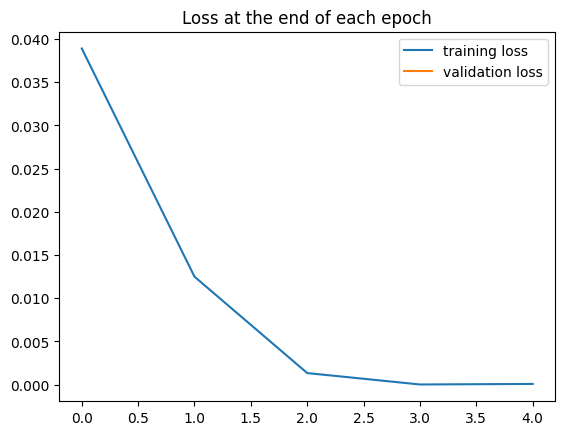

In [ ]:
train_losses = [t.detach().numpy() for t in train_losses]
test_losses = [t.detach().numpy() for t in test_losses]

plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();
plt.show()

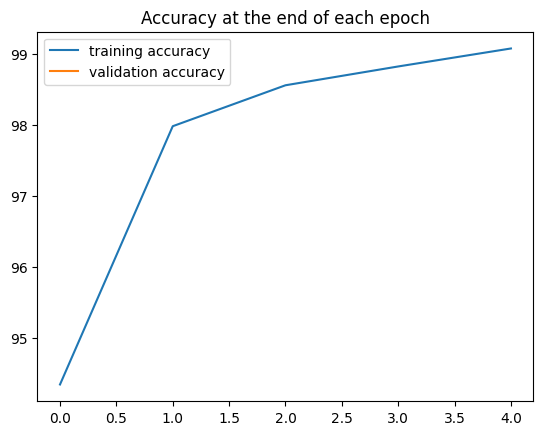

In [ ]:

plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();
plt.show()

In [ ]:

test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [ ]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

In [ ]:
print("name:SANJAY M")
print("reg no:212222110038")

name:SANJAY M
reg no:212222110038


In [ ]:




correct.item()

9880

In [ ]:

correct.item()/len(test_data)


0.988

In [ ]:


np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 976    0    1    0    0    1    4    0    5    0]
 [   0 1128    0    0    1    0    2    3    1    0]
 [   0    0 1020    3    0    0    2    8    1    1]
 [   0    2    2  998    0    1    0    0    3    1]
 [   0    0    2    0  971    0    1    0    0    4]
 [   2    1    0    7    0  886    3    0    2    5]
 [   1    1    0    0    6    1  945    0    1    0]
 [   1    2    6    2    0    1    0 1013    3    3]
 [   0    1    1    0    1    1    1    1  955    7]
 [   0    0    0    0    3    1    0    3    3  988]]


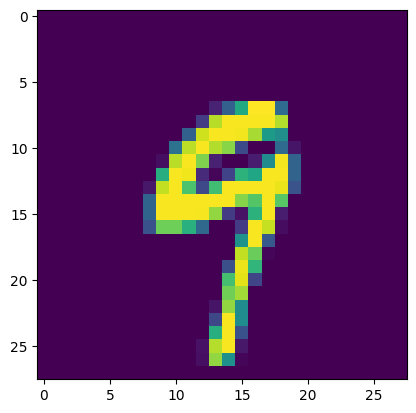

In [ ]:
plt.imshow(test_data[2019][0].reshape(28,28))
plt.show()

In [ ]:
model.eval()
with torch.no_grad():
    new_prediction = model(test_data[2019][0].view(1,1,28,28))

In [ ]:


new_prediction.argmax()

tensor(9)

In [ ]:

torch.save(model.state_dict(), 'sanjay.pt')

In [ ]:

new_model = ConvolutionalNetwork() # Replace Model with ConvolutionalNetwork
new_model.load_state_dict(torch.load('sanjay.pt'))
new_model.eval()

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)